<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_3__Mutual_Funds_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Mutual Fund

*   A Mutual Fund is unit of investment, managed by an Asset Management Company (AMC)
*   During a New Fund Offering (NFO), the AMC sells 'units' to individual investors at Rs 10 each
*   With the money so collected, the AMC purchases securities (equity shares, debentures, 'commercial paper' etc) either from the open market or from other sources. These are the underlying securities.
*   The value of MF units is determined by the weighted average of the value ( or price) of the underlying securities in the open market. This is called the Net Asset Value (NAV) of the fund, or more specifically, units of the fund.
*   The NAV is determined once a day by the AMC. Unlike equity shares, there is no OPEN, HIGH, LOW, CLOSE value.
*   Subsequent (or non NFO) users, can buy or sell units from the AMC at the current NAV of the fund.











## Difference between Equity Shares and MF Units


1.   After, the IPO, Equity Shares are traded between individual investors at a price determined by the supply-demand of shares in the market, or exchange. The company has nothing to do with the price, except keeping record of who owns them.
2.   Even after the NFO, individual investors buy and sell units from the AMC, not from each other. The price is determined once a day based on the price of the underlying securities and is announced by the AMC on a daily basis. The AMC buys and sells the underlying securities depending on the demand or supply of the units



##Mutual Fund Analysis with AMFI data <br>
Realtime MF data can be accessed with https://mftool.readthedocs.io/en/latest/# <br>

However we will use data that can be downloaded from AMFI  https://www.amfiindia.com/net-asset-value <br>
see the list of funds that are availale at https://drive.google.com/file/d/1TtyIIkQtIgjmfk2lE0qecNHVV2hWmp4K/view?usp=sharing <br>
NIFTY data is available at https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm

#Get Data

In [1]:
# Three years data, 1 Jan 2020 - 31 Dec 2022
#
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Birla.xlsx 
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Canara.xlsx
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/icici.xlsx
!wget -q https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NIFTY_50_Data_2020-2022.csv

In [2]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'20 February 2023'

##NIFTY Data
NIFTY data is available at https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm

In [3]:
dfNIFTY_ = pd.read_csv('/content/NIFTY_50_Data_2020-2022.csv', header=0)
dfNIFTY = dfNIFTY_.loc[::-1]                                                # reverse the order of rows
dfNIFTY['Date'] =  pd.to_datetime(dfNIFTY['Date'], format='%d %b %Y')       # set the Date column to date formatt
                                                                            # alternate formats https://docs.python.org/3.7/library/datetime.html#strftime-strptime-behavior
dfNIFTY.set_index('Date', inplace =True)                                    #
dfNIFTY.drop(['Open','High','Low'], axis = 1, inplace =True)                # Drop three columns
dfNIFTY = dfNIFTY.rename(columns ={'Close':'NIFTY'})                        # Rename CLOSE column to NIFTY
dfNIFTY.head()


,NIFTY
Date,
2020-01-01,12182.50
2020-01-02,12282.20
2020-01-03,12226.65
2020-01-06,11993.05
2020-01-07,12052.95


In [4]:
#print(dfNIFTY)
dfNIFTY.count()

NIFTY    748
dtype: int64

##Fund NAV Data

Mutual Fund Data <br>
From this we choose the following <br>


1.   Aditya Birla Sun Life Frontline Equity Fund-Growth
2.   Canara Robeco Bluechip Equity Fund - Regular Plan - Growth
3.   ICICI Prudential - Nifty  Index-Regular Plan

and download the current data 

In [5]:
# Read xlsx data into dataframe
def xlsx2df(fileName, fundName):
    df = pd.read_excel(fileName, header=4)                                      # convert xlsx file into dataframe, ignore first four lines
    df.drop(['Repurchase Price','Sale Price'], axis = 1, inplace =True)         #  drop two unnecessary columns
    df = df.rename(columns ={'NAV date':'Date','Net Asset Value':fundName })    # rename column with fund name for comparisons later
    df['Date'] =  pd.to_datetime(df['Date'])                                    # change the date from string to date-time format       
    df.drop_duplicates(inplace = True)                                          # remove duplicate data from the set
    df.set_index('Date', inplace =True)                                         # make the Date column as the index 
    return df                                                                   # return the dataframe

In [6]:
dfBirla = xlsx2df('Birla.xlsx','Birla')
dfICICI = xlsx2df('icici.xlsx','ICICI')
dfCanara = xlsx2df('Canara.xlsx','Canara')
dfBirla.count(), dfICICI.count(), dfCanara.count()

(Birla    744
 dtype: int64, ICICI    744
 dtype: int64, Canara    744
 dtype: int64)

In [7]:
dfICICI.head()

,ICICI
Date,
2020-01-01,121.4474
2020-01-02,122.4356
2020-01-03,121.8871
2020-01-06,119.5867
2020-01-07,120.1723


In [8]:
#duplicate = dfBirla[dfBirla.duplicated('Date',keep=False)]
#print(duplicate)

#Merge Data for Comparison

In [9]:
dfCompare = pd.merge(dfNIFTY,dfBirla,how='inner',on='Date',sort=False,copy=True,indicator=True)
dfCompare.count()

NIFTY     744
Birla     744
_merge    744
dtype: int64

In [10]:
dfCompare.head(5)

,NIFTY,Birla,_merge
Date,,,
2020-01-01,12182.50,248.12,both
2020-01-02,12282.20,250.23,both
2020-01-03,12226.65,249.32,both
2020-01-06,11993.05,244.38,both
2020-01-07,12052.95,245.27,both


#Charts

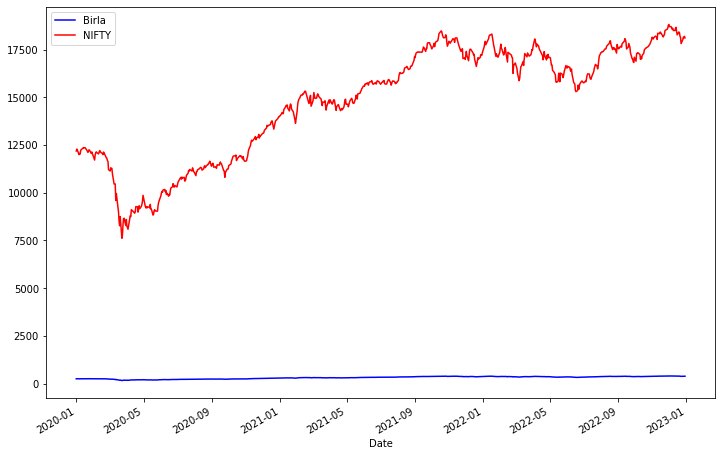

In [11]:
# Plotting directly from DataFrames with Pandas
dfCompare.plot(y=['Birla','NIFTY'],kind='line', color=['blue','red'], figsize=(12,8));



In [12]:
#we need to scale the data
dfCompare['Adj Birla'] = dfCompare['Birla']/dfCompare.iloc[0]['Birla']
dfCompare['Adj NIFTY'] = dfCompare['NIFTY']/dfCompare.iloc[0]['NIFTY']
dfCompare.head()

,NIFTY,Birla,_merge,Adj Birla,Adj NIFTY
Date,,,,,
2020-01-01,12182.50,248.12,both,1.000000,1.000000
2020-01-02,12282.20,250.23,both,1.008504,1.008184
2020-01-03,12226.65,249.32,both,1.004836,1.003624
2020-01-06,11993.05,244.38,both,0.984927,0.984449
2020-01-07,12052.95,245.27,both,0.988514,0.989366


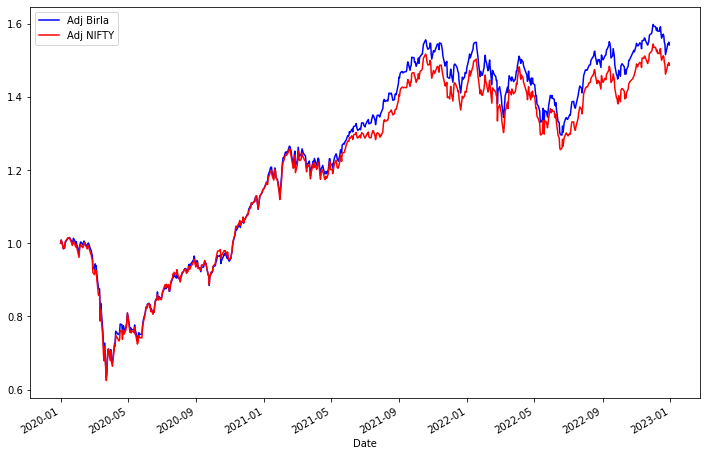

In [13]:
# Plotting directly from DataFrames with Pandas
dfCompare.plot(y=['Adj Birla','Adj NIFTY'], kind='line', color=['blue','red'],figsize=(12,8));



#Multiple Funds

##Data Collection

In [14]:
df1 = pd.merge(dfNIFTY,dfBirla,how='inner',on='Date',sort=False,copy=True)
df2 = pd.merge(df1,dfCanara,how='inner',on='Date',sort=False,copy=True)
dfFunds = pd.merge(df2,dfICICI,how='inner',on='Date',sort=False,copy=True)
dfFunds.head()
#dfFunds.count()

,NIFTY,Birla,Canara,ICICI
Date,,,,
2020-01-01,12182.50,248.12,29.16,121.4474
2020-01-02,12282.20,250.23,29.34,122.4356
2020-01-03,12226.65,249.32,29.24,121.8871
2020-01-06,11993.05,244.38,28.76,119.5867
2020-01-07,12052.95,245.27,28.93,120.1723


##Ratios
Can be applied to any security

*   For Mutual Funds, NAV is used
*   For Equity Shares, CLOSE price can be used



### Daily Return

In [15]:
#Calculate the Daily Returns

dfReturns = dfFunds[['NIFTY','Birla','Canara','ICICI']].pct_change()
dfReturns.head()

,NIFTY,Birla,Canara,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008184,0.008504,0.006173,0.008137
2020-01-03,-0.004523,-0.003637,-0.003408,-0.004480
2020-01-06,-0.019106,-0.019814,-0.016416,-0.018873
2020-01-07,0.004995,0.003642,0.005911,0.004897


In [16]:
# Average of Daily Returns
dfmeans = dfReturns.mean().to_frame()
dfmeans.columns=['mean']
dfmeans

,mean
NIFTY,0.000636
Birla,0.000673
Canara,0.000725
ICICI,0.000669


In [17]:
#this is std of daily returns
#do we need to convert this to standard deviation of annual returns
dfstdev = dfReturns.std().to_frame()
dfstdev.columns = ['stdev']
dfstdev

,stdev
NIFTY,0.014242
Birla,0.013360
Canara,0.012740
ICICI,0.014106


In [18]:
dfcomparison = dfmeans.merge(dfstdev,left_index=True,right_index=True)
dfcomparison

,mean,stdev
NIFTY,0.000636,0.014242
Birla,0.000673,0.013360
Canara,0.000725,0.012740
ICICI,0.000669,0.014106


In [19]:
#Calculate Covariance of Returns
dfrcov = dfReturns.cov()
dfrcov

,NIFTY,Birla,Canara,ICICI
NIFTY,0.000203,0.000188,0.000180,0.000201
Birla,0.000188,0.000178,0.000168,0.000186
Canara,0.000180,0.000168,0.000162,0.000178
ICICI,0.000201,0.000186,0.000178,0.000199


In [20]:
dfrcov['NIFTY']

NIFTY     0.000203
Birla     0.000188
Canara    0.000180
ICICI     0.000201
Name: NIFTY, dtype: float64

In [21]:
# Volatility of NIFTY
dfrcov['NIFTY']['NIFTY']

0.00020283127451708462

### Beta
What is the [beta](https://www.investopedia.com/investing/beta-know-risk/#:~:text=Beta%20is%20a%20concept%20that,a%20stock%20with%20lower%20volatility) of a security? <br>

beta = covariance of price with reference / variance of reference

In [22]:
dfbeta = pd.DataFrame(dfrcov['NIFTY']/dfrcov['NIFTY']['NIFTY'])
dfbeta.columns = ['beta']
dfbeta

,beta
NIFTY,1.000000
Birla,0.926708
Canara,0.885345
ICICI,0.990317


In [23]:
dfcomparison = dfcomparison.merge(dfbeta,left_index=True,right_index=True)
dfcomparison

,mean,stdev,beta
NIFTY,0.000636,0.014242,1.000000
Birla,0.000673,0.013360,0.926708
Canara,0.000725,0.012740,0.885345
ICICI,0.000669,0.014106,0.990317


### Sharpe Ratio
What is [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)? 

In [24]:
# Risk Free Return
rFree = 0.0002  # daily return, multiply by 252 to get annual return ~ 5%

dfcomparison['Sharpe'] = (dfcomparison['mean']-rFree)/dfcomparison['stdev']
dfcomparison

,mean,stdev,beta,Sharpe
NIFTY,0.000636,0.014242,1.000000,0.030619
Birla,0.000673,0.013360,0.926708,0.035431
Canara,0.000725,0.012740,0.885345,0.041190
ICICI,0.000669,0.014106,0.990317,0.033226


###Treynor Ratio
What is [Treynor Ratio](https://www.investopedia.com/terms/t/treynorratio.asp) ?

In [25]:
dfcomparison['Treynor'] = (dfcomparison['mean']-rFree)/dfcomparison['beta']
dfcomparison

,mean,stdev,beta,Sharpe,Treynor
NIFTY,0.000636,0.014242,1.000000,0.030619,0.000436
Birla,0.000673,0.013360,0.926708,0.035431,0.000511
Canara,0.000725,0.012740,0.885345,0.041190,0.000593
ICICI,0.000669,0.014106,0.990317,0.033226,0.000473


### Alpha
What is [Jenson's Alpha](https://www.investopedia.com/terms/j/jensensmeasure.asp) ?

In [26]:
rFree = 0.0002  # daily return, multiply by 252 to get annual return ~ 5%
Rm = dfcomparison['mean']['NIFTY']    # the realized return of the appropriate market index
Rm

0.0006360655967905987

In [27]:
#Jensons Alpha 
dfcomparison['alpha'] = dfcomparison['mean']-(rFree+dfcomparison['beta']*(Rm-rFree))
dfcomparison

,mean,stdev,beta,Sharpe,Treynor,alpha
NIFTY,0.000636,0.014242,1.000000,0.030619,0.000436,0.000000
Birla,0.000673,0.013360,0.926708,0.035431,0.000511,0.000069
Canara,0.000725,0.012740,0.885345,0.041190,0.000593,0.000139
ICICI,0.000669,0.014106,0.990317,0.033226,0.000473,0.000037


### Annualised Return

In [28]:
# Annualised Return
TradingDays = 252
dfcomparison['Annual Return'] = dfcomparison['mean']*TradingDays
dfcomparison

,mean,stdev,beta,Sharpe,Treynor,alpha,Annual Return
NIFTY,0.000636,0.014242,1.000000,0.030619,0.000436,0.000000,0.160289
Birla,0.000673,0.013360,0.926708,0.035431,0.000511,0.000069,0.169689
Canara,0.000725,0.012740,0.885345,0.041190,0.000593,0.000139,0.182637
ICICI,0.000669,0.014106,0.990317,0.033226,0.000473,0.000037,0.168513


##Multi Chart Comparison

In [29]:
dfCharts = dfFunds.copy()
dfCharts.head()

,NIFTY,Birla,Canara,ICICI
Date,,,,
2020-01-01,12182.50,248.12,29.16,121.4474
2020-01-02,12282.20,250.23,29.34,122.4356
2020-01-03,12226.65,249.32,29.24,121.8871
2020-01-06,11993.05,244.38,28.76,119.5867
2020-01-07,12052.95,245.27,28.93,120.1723


In [30]:
dfCharts['NIFTY_'] = dfCharts['NIFTY']/dfCharts.iloc[0]['NIFTY']
dfCharts['Birla_'] = dfCharts['Birla']/dfCharts.iloc[0]['Birla']
dfCharts['Canara_'] = dfCharts['Canara']/dfCharts.iloc[0]['Canara']
dfCharts['ICICI_'] = dfCharts['ICICI']/dfCharts.iloc[0]['ICICI']
dfCharts.head()

,NIFTY,Birla,Canara,ICICI,NIFTY_,Birla_,Canara_,ICICI_
Date,,,,,,,,
2020-01-01,12182.50,248.12,29.16,121.4474,1.000000,1.000000,1.000000,1.000000
2020-01-02,12282.20,250.23,29.34,122.4356,1.008184,1.008504,1.006173,1.008137
2020-01-03,12226.65,249.32,29.24,121.8871,1.003624,1.004836,1.002743,1.003620
2020-01-06,11993.05,244.38,28.76,119.5867,0.984449,0.984927,0.986283,0.984679
2020-01-07,12052.95,245.27,28.93,120.1723,0.989366,0.988514,0.992112,0.989501


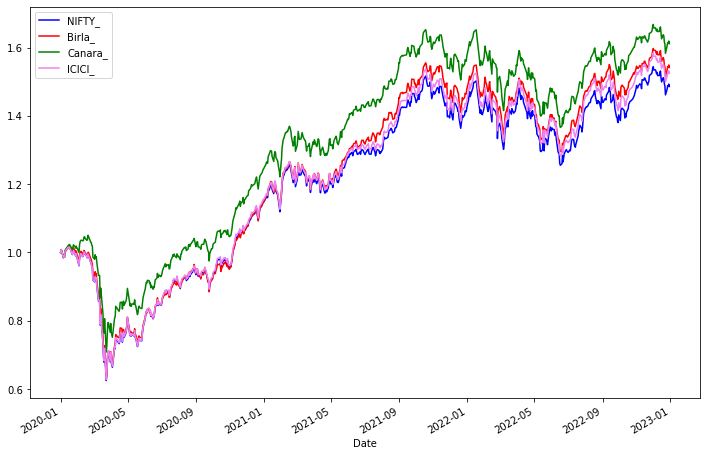

In [31]:
# Plotting directly from DataFrames with Pandas
dfCharts.plot(y=['NIFTY_','Birla_','Canara_','ICICI_'],kind='line', color=['blue','red','green','violet'],figsize=(12,8));
    


#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)